# Import Libraries

In [60]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import pickle
import json

# Data Loading

In [61]:
# setting untuk menampilkan seluruh kolom
pd.set_option('display.max_column', None)

In [62]:
# load data
data = pd.read_csv('rideshare_kaggle.csv')
data.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


In [63]:
# Duplicate Data 
data_duplicate = data.copy()

In [64]:
data.shape

(693071, 57)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Dari info tersebut pada dataset ini terdapat 56 kolom dengan 3 tipe jenis data yaitu:
- 29 kolom dengan tipe data float
- 17 kolom dengan tipe data integer
- 11 kolom dengan type data object

In [66]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,693071.0,1.544046e+09,689192.492586,1.543204e+09,1.543444e+09,1.543737e+09,1.544828e+09,1.545161e+09
hour,693071.0,1.161914e+01,6.948114,0.000000e+00,6.000000e+00,1.200000e+01,1.800000e+01,2.300000e+01
day,693071.0,1.779436e+01,9.982286,1.000000e+00,1.300000e+01,1.700000e+01,2.800000e+01,3.000000e+01
month,693071.0,1.158668e+01,0.492429,1.100000e+01,1.100000e+01,1.200000e+01,1.200000e+01,1.200000e+01
price,637976.0,1.654513e+01,9.324359,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
distance,693071.0,2.189430e+00,1.138937,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
surge_multiplier,693071.0,1.013870e+00,0.091641,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
latitude,693071.0,4.233817e+01,0.047840,4.221480e+01,4.235030e+01,4.235190e+01,4.236470e+01,4.236610e+01
longitude,693071.0,-7.106615e+01,0.020302,-7.110540e+01,-7.108100e+01,-7.106310e+01,-7.105420e+01,-7.103300e+01
temperature,693071.0,3.958439e+01,6.726084,1.891000e+01,3.645000e+01,4.049000e+01,4.358000e+01,5.722000e+01


Dari hasil di atas kita dapat melihat summary statistics dari kolom dataframe dengan tipe data numeric seperti rata-rata, standar deviasi, quartile, nilai minimum, dan nilai maksimum.

# Exploratory Data Analysis (EDA)

*Alasan : ingin melihat persebaran harga pada dataset*

Skewness:  1.0457470560899256
Mean:  16.545125490614065
Median:  13.5


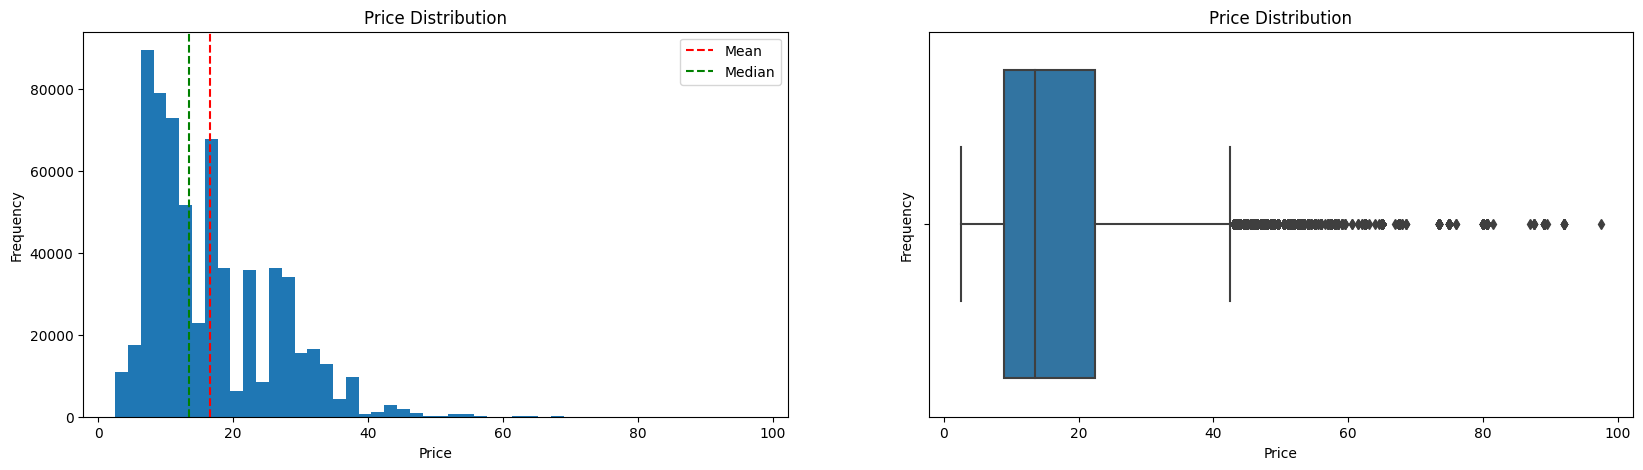

In [67]:
print('Skewness: ',data.price.skew())
print('Mean: ',data.price.mean())
print('Median: ', data.price.median())
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.hist(x='price', bins=50, data=data)
plt.axvline(data.price.mean(), color = 'red', label="Mean", linestyle = 'dashed')
plt.axvline(data.price.median(),color = 'green', label="Median", linestyle = 'dashed')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='price', data=data)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()


Pada grafik histogram terlihat bahwa distribusi kolom price berbentuk right skewed dengan nilai skew 1, dan pada boxplot kolom price terlihat bahwa kolom ini memiliki outlier.

*Alasan : ingin melihat jumlah order pada tiap jam, hari dan bulan*

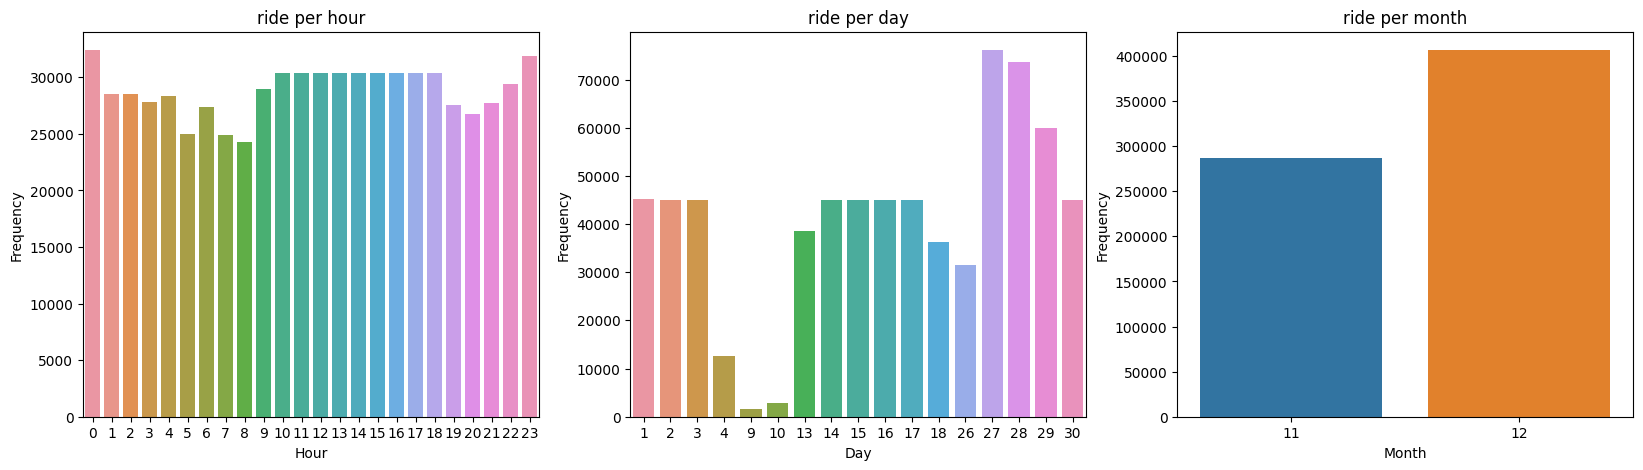

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='hour', data = data)
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('ride per hour')

plt.subplot(1,3,2)
sns.countplot(x='day', data = data)
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('ride per day')

plt.subplot(1,3,3)
sns.countplot(x='month', data = data)
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('ride per month')
plt.show()

Berdasarkan personal judgement pada grafik ride per hour dapat dilihat terdapat penurunan jumlah pengguna dari pukul 0 sampai 8 karena pada jam tersebut sebagian besar manusia tidak melakukan aktivitas atau sedang beristirahat dan terjadi peningkatan pada pukul 9 karena orang orang sudah melakukan aktivitasnya kembali, pada grafik ride per day trjadi peningkatan pada tanggal 27 november karena itu minggu terakhir pada bulan november dan di USA memiliki hari libur nasional pada minggu tersebut sehingga orang orang banyak melakukan aktivitas, dan pada grafik ride per month pengguna tertinggi ada pada bulan desember, meskipun pelonjakan tertinggi ada pada bulan november ini bisa terjadi karena dataset ini hanya memiliki data bulan november dari tanggal 26 november sedangkan pada bulan desember terdapat data dari tanggal 1 desember sampai 18 desemeber. 

*Alasan : ingin melihat perbedaan kolom `id`, `product_id`, `cab_type`, dan `name`*

In [69]:
data[['id','product_id','cab_type','name']].head(10)

,id,product_id,cab_type,name
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Lyft,Shared
1,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lyft,Lux
2,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,Lyft
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lyft,Lux Black XL
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft,Lyft XL
5,f6f6d7e4-3e18-4922-a5f5-181cdd3fa6f2,lyft_lux,Lyft,Lux Black
6,462816a3-820d-408b-8549-0b39e82f65ac,lyft_plus,Lyft,Lyft XL
7,474d6376-bc59-4ec9-bf57-4e6d6faeb165,lyft_lux,Lyft,Lux Black
8,4f9fee41-fde3-4767-bbf1-a00e108701fb,lyft_line,Lyft,Shared
9,8612d909-98b8-4454-a093-30bd48de0cb3,lyft_luxsuv,Lyft,Lux Black XL


Pada kolom diatas dapat dilihat bahwa kolom `product_id` dapat diwakilkan oleh kolom `name`, sehingga nantinya kolom `product_id` tidak akan digunakan sebagai feature.

*Alasan : ingin melihat surge_multiplier pada setiap cab_type*

In [70]:
data.groupby(['cab_type','surge_multiplier']).size()

cab_type  surge_multiplier
Lyft      1.00                286433
          1.25                 11085
          1.50                  5065
          1.75                  2420
          2.00                  2239
          2.50                   154
          3.00                    12
Uber      1.00                385663
dtype: int64

jika permintaan perjalanan banyak, maka harga perjalanan akan dikalikan berdasarkan kolom surge_multiplier terlihat pada cab_type Lyft harga bisa dikalikan dari 1x sampai 3x sedangkan pada Uber tidak terdapat peningkatan harga meskipun jumlah permintaan banyak

*Alasan : ingin melihat hubungan antara kolom `price` dan `distance`*

<AxesSubplot: xlabel='distance', ylabel='price'>

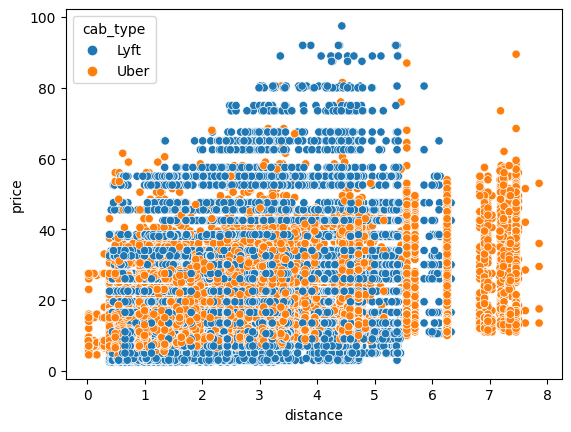

In [71]:
# Menampilkan hubungan antara price dan distance berdasarkan cab_type
sns.scatterplot(x='distance', y='price', hue='cab_type', data=data)

Pada scatter plot diatas terlihat bahwa hubungan antara kolom `price` dan `distance` saling berkaitan, dibuktikan dengan ketika jarak atau distance semakin jauh maka harga yang diberikan meningkat

In [72]:
# Menampilkan nilai korelasi antar kolom
correlation = data.corr()
correlation.style.background_gradient(cmap='seismic')

C:\Users\salma\AppData\Local\Temp\ipykernel_31424\2995444438.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
timestamp,1.000000,-0.028004,-0.341292,0.771182,0.000808,0.003553,0.000572,0.168130,-0.136802,-0.248748,-0.226264,-0.179958,-0.147596,-0.168024,-0.066171,0.005706,0.998842,0.158993,-0.228125,0.999332,-0.366859,0.999175,-0.215363,0.999313,-0.401999,0.999203,-0.265444,0.533025,-0.133526,-0.081699,-0.025708,0.158993,0.196518,0.999372,0.999372,-0.846203,-0.211700,0.999364,-0.306971,0.998194,-0.186328,0.999290,-0.378346,0.998286,-0.157748,0.999276
hour,-0.028004,1.000000,0.066090,-0.079379,0.000561,0.002280,-0.000077,0.019493,-0.006295,0.218769,0.198190,-0.233349,-0.129725,-0.275762,0.072778,0.077308,-0.028047,0.174129,0.005172,-0.027838,0.015326,-0.026797,0.005513,-0.027997,0.016005,-0.026970,0.004839,-0.067366,0.036089,0.026525,0.330209,0.174129,0.034164,-0.027537,-0.027535,0.020483,0.019940,-0.027518,0.015513,-0.027027,0.002958,-0.027990,0.015820,-0.027704,0.002897,-0.027785
day,-0.341292,0.066090,1.000000,-0.861306,-0.000722,-0.000627,0.001389,0.006838,0.078690,-0.084116,-0.223545,0.091664,0.030903,-0.093340,0.440502,0.402637,-0.336417,0.104992,-0.283561,-0.343118,-0.088320,-0.333558,-0.398183,-0.343291,-0.192984,-0.335504,-0.101582,-0.444635,0.092167,-0.041190,-0.011885,0.104992,0.377057,-0.341068,-0.341012,-0.007260,0.145568,-0.341198,0.038076,-0.333990,-0.304870,-0.344532,-0.019940,-0.335043,-0.444445,-0.344411
month,0.771182,-0.079379,-0.861306,1.000000,0.000913,0.002298,-0.000628,0.085791,-0.126912,-0.081774,0.024983,-0.154531,-0.098031,-0.022256,-0.334803,-0.270494,0.767265,0.011493,0.068313,0.772053,-0.138732,0.765489,0.152651,0.772163,-0.086998,0.766822,-0.074794,0.589609,-0.135103,-0.016800,-0.012321,0.011493,-0.149333,0.770684,0.770646,-0.452469,-0.213054,0.770767,-0.191803,0.765255,0.105326,0.772989,-0.191153,0.766031,0.215076,0.772896
price,0.000808,0.000561,-0.000722,0.000913,1.000000,0.345061,0.240458,0.002088,-0.001417,-0.000084,-0.000193,0.000166,-0.000243,-0.001238,0.000990,0.001218,0.000851,0.001497,-0.000516,0.000759,0.000182,0.000754,-0.000261,0.000741,0.000831,0.000761,-0.000615,0.000866,-0.001382,0.000883,-0.000424,0.001497,0.000460,0.000760,0.000760,-0.001602,0.001114,0.000763,-0.000428,0.000769,-0.000550,0.000766,-0.000580,0.000814,-0.000290,0.000746
distance,0.003553,0.002280,-0.000627,0.002298,0.345061,1.000000,0.024769,0.000819,-0.000293,-0.002884,-0.003116,-0.000256,0.000371,-0.003901,0.002277,0.001364,0.003618,0.004092,-0.004154,0.003604,-0.002146,0.003556,-0.004098,0.003585,-0.001501,0.003583,-0.004078,0.003490,-0.002146,-0.000905,0.002318,0.004092,0.001467,0.003556,0.003556,-0.004594,0.000648,0.003562,-0.003396,0.003428,-0.004191,0.003580,-0.003937,0.003526,-0.004238,0.003584
surge_multiplier,0.000572,-0.000077,0.001389,-0.000628,0.240458,0.024769,1.000000,0.001375,-0.001829,-0.001572,-0.002532,-0.001530,-0.002769,-0.001676,0.002511,0.002093,0.000439,0.001714,-0.001897,0.000520,-0.002601,0.000573,-0.002041,0.000520,-0.002994,0.000551,-0.001849,-0.003003,0.002167,-0.002103,-0.002422,0.001714,0.003324,0.000544,0.000544,-0.000150,-0.000101,0.000544,-0.000724,0.000554,-0.001951,0.000522,-0.001304,0.000464,-0.002154,0.000519
latitude,0.168130,0.019493,0.006838,0.085791,0.002088,0.000819,0.001375,1.000000,-0.531259,-0.098604,-0.067098,-0.074181,-0.071275,-0.117481,-0.097139,0.024309,0.172625,0.124166,-0.115307,0.173702,-0.032133,0.171193,-0.092167,0

korelasi diatas memperlihatkan hubungan antara masing masing kolom numeric, dari hasil diatas menunjukan bahwa kolom price memiliki hubungan dengan distance dan surge_multiplier, untuk nantinya dijadikan sebagai feature untuk model prediksi

In [73]:
# Menampilkan nilai korelasi antar kolom
cat_corr = pd.get_dummies(data[['price', 'source', 'destination', 'cab_type', 'name', 'short_summary']]).corr()
cat_corr.style.background_gradient(cmap='seismic')

,price,source_Back Bay,source_Beacon Hill,source_Boston University,source_Fenway,source_Financial District,source_Haymarket Square,source_North End,source_North Station,source_Northeastern University,source_South Station,source_Theatre District,source_West End,destination_Back Bay,destination_Beacon Hill,destination_Boston University,destination_Fenway,destination_Financial District,destination_Haymarket Square,destination_North End,destination_North Station,destination_Northeastern University,destination_South Station,destination_Theatre District,destination_West End,cab_type_Lyft,cab_type_Uber,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_Taxi,name_UberPool,name_UberX,name_UberXL,name_WAV,short_summary_ Clear,short_summary_ Drizzle,short_summary_ Foggy,short_summary_ Light Rain,short_summary_ Mostly Cloudy,short_summary_ Overcast,short_summary_ Partly Cloudy,short_summary_ Possible Drizzle,short_summary_ Rain
price,1.000000,-0.016101,-0.028396,0.074634,0.059317,0.053468,-0.095924,-0.045006,-0.005821,0.043847,-0.028216,0.001678,-0.014092,-0.010834,-0.009565,0.077515,0.051780,0.049051,-0.074040,-0.049891,0.008360,0.041467,-0.055504,-0.018458,-0.010306,0.083385,-0.083385,0.131185,0.453096,0.038857,0.206544,0.500057,-0.219756,-0.039163,-0.333235,nan,-0.256930,-0.223551,-0.028587,-0.223557,-0.002387,-0.000480,-0.000052,0.000508,0.002734,-0.000729,0.000350,-0.001137,-0.000104
source_Back Bay,-0.016101,1.000000,-0.090637,-0.090947,-0.090941,-0.091882,-0.090923,-0.090946,-0.090391,-0.090940,-0.090935,-0.090989,-0.090773,-0.090961,-0.090637,0.087202,0.087860,-0.091877,0.090412,0.102137,-0.090392,0.090036,0.087972,-0.090976,-0.090785,0.000228,-0.000228,-0.000060,-0.000062,0.000075,0.000075,0.000075,0.000075,0.000075,0.000058,-0.000060,-0.000054,-0.000059,-0.000062,-0.000062,-0.000898,0.001106,0.000989,0.000447,-0.001110,0.002429,-0.002098,-0.000257,0.000711
source_Beacon Hill,-0.028396,-0.090637,1.000000,-0.090613,-0.090607,-0.091545,-0.090589,-0.090612,-0.090059,-0.090606,-0.090601,-0.090655,-0.090440,-0.090626,-0.090303,0.084050,0.088119,-0.091540,0.090565,0.099543,-0.090060,0.092821,0.088516,-0.090642,-0.090451,0.000034,-0.000034,-0.000004,-0.000005,0.000010,0.000010,0.000010,0.000010,0.000010,0.000013,-0.000023,-0.000017,-0.000002,-0.000005,-0.000005,-0.000823,-0.001297,0.004775,0.001453,0.001184,-0.002092,0.000484,-0.001602,0.000175
source_Boston University,0.074634,-0.090947,-0.090613,1.000000,-0.090917,-0.091858,-0.090899,-0.090922,-0.090367,-0.090916,-0.090911,-0.090965,-0.090749,0.087229,0.083917,-0.090923,-0.090917,0.090002,-0.090923,-0.090916,0.089587,-0.090915,-0.090910,0.097233,0.097547,-0.000010,0.000010,0.000002,0.000000,-0.000004,-0.000004,-0.000004,-0.000004,-0.000004,-0.000000,0.000002,0.000009,0.000004,0.000000,0.000000,-0.000213,0.000047,-0.003590,-0.001327,0.002087,-0.001570,0.000749,-0.003783,0.005678
source_Fenway,0.059317,-0.090941,-0.090607,-0.090917,1.000000,-0.091852,-0.090893,-0.090916,-0.090361,-0.090910,-0.090905,-0.090959,-0.090743,0.088019,0.088119,-0.090917,-0.090911,0.089456,-0.090917,-0.090910,0.094747,-0.090909,-0.090904,0.083673,0.101517,0.000023,-0.000023,-0.000006,-0.000008,0.000007,0.000007,0.000007,0.000007,0.000007,0.000010,-0.000006,-0.000000,-0.000005,-0.000008,-0.000008,0.000573,0.000716,-0.000460,-0.004389,-0.001323,0.000487,0.003436,-0.001034,0.000688
source_Financial District,0.053468,-0.091882,-0.091545,-0.091858,-0.091852,1.000000,-0.091834,-0.091857,-0.091297,-0.091851,-0.091846,-0.091901,-0.091683,-0.091872,-0.091545,0.089988,0.089704,-0.092798,0.097890,0.083040,-0.091298,0.088436,0.102027,-0.091888,-0.091694,0.001368,-0.001368,-0.000359,-0.000361,0.000436,0.000436,0.000436,0.000436,0.000436,0.000419,-0.000359,-0.000353,-0.000358,-0.000361,-0.000361,-0.000327,-0.001805,-0.000474,0.005668,0.001682,-0.001314,-0.002047,-0.000371,-0.002240
source_Haymarket Square,-0.095924,-0.090923,-0.090589,-0.090899,-0.090893,-0.091834,1.00

korelasi diatas memperlihatkan hubungan antara masing masing kolom kategori, dari hasil diatas menunjukan bahwa kolom price memiliki hubungan dengan name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL yang artinya nama nama tersebut berada di kolom name sehinggan kolom name akan dijadikan feature untuk nantinya dijadikan sebagai feature untuk model prediksi

# Data Preprocessing

## Data inference

In [74]:
# Membuat data inference
data_inference = data.sample(10, random_state= 20)
# menghapus data inference pada data yang akan dilakukan untuk training
data = data.drop(data_inference.index)

In [75]:
data_inference.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
668305,3ff3d7ec-44d9-4fd7-a2a0-abc5b672fef3,1.545037e+09,9,17,12,2018-12-17 09:00:06,America/New_York,Boston University,West End,Lyft,lyft_line,Shared,7.0,3.05,1.0,42.3644,-71.0661,35.84,29.23,Drizzle,Light rain in the morning.,0.0092,0.74,0.94,8.52,10.39,1545022800,3.606,41.39,1545076800,23.87,1545138000,35.93,1545076800,11.81,1545134400,rain,34.25,1004.71,352,1.00,0,3.606,329.7,1545048561,1545081260,0.33,0.0185,1545066000,34.07,1545044400,41.39,1545076800,28.17,1545044400,35.93,1545076800
280573,035151ff-b0fc-466e-9a79-f932a15d9b3b,1.545155e+09,17,18,12,2018-12-18 17:50:05,America/New_York,Northeastern University,Financial District,Lyft,lyft,Lyft,13.5,4.22,1.0,42.3429,-71.1003,30.78,20.93,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.40,12.73,22.33,1545127200,10.000,32.84,1545159600,20.72,1545220800,22.96,1545159600,14.48,1545195600,clear-day,9.15,1010.60,322,0.00,1,10.000,377.1,1545135001,1545167693,0.37,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
539953,8411ca10-8f18-498b-a71a-06c401e22183,1.543596e+09,16,30,11,2018-11-30 16:43:05,America/New_York,Theatre District,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,1.57,1.0,42.3503,-71.0810,40.13,38.00,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.62,3.46,4.47,1543554000,9.920,42.32,1543600800,31.57,1543665600,40.48,1543611600,28.10,1543658400,clear-day,27.99,1016.84,291,0.12,2,9.920,269.9,1543578871,1543612479,0.79,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
332095,8a010343-d389-4317-bb13-ea17629414cc,1.543817e+09,6,3,12,2018-12-03 06:02:56,America/New_York,North Station,North End,Lyft,lyft_premier,Lux,13.5,1.04,1.0,42.3503,-71.0810,45.58,45.58,Foggy,Foggy in the morning.,0.0000,0.00,0.96,1.25,2.09,1543856400,1.413,57.02,1543852800,33.74,1543921200,56.35,1543852800,28.53,1543914000,fog,44.50,1001.06,307,1.00,0,1.413,290.9,1543838259,1543871628,0.89,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
167331,b8bebed0-f7b9-428e-a9b6-32e53eff723e,1.543599e+09,17,30,11,2018-11-30 17:28:03,America/New_York,South Station,Financial District,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.61,1.0,42.2148,-71.0330,41.46,39.41,Mostly Cloudy,Overcast throughout the day.,0.0000,0.00,0.57,3.57,4.27,1543557600,9.928,42.13,1543600800,30.17,1543662000,40.95,1543608000,25.87,1543662000,partly-cloudy-day,27.50,1016.11,266,0.86,1,9.928,271.7,1543578835,1543612492,0.79,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000


## Split between Train-Set and Test-Set

In [76]:
# Splitting data 
data_train,data_test = train_test_split(data, test_size=0.2, random_state=27)

membuat training-Set dan Test-Set dengan perbandingan 8:2 dimana 80% untuk training set dan 20% untuk test set

In [77]:
data_train.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
316659,e5ad6d06-c802-4e85-8a13-2da1e19532f5,1.544856e+09,6,15,12,2018-12-15 06:35:11,America/New_York,Theatre District,Fenway,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,0.88,1.0,42.3661,-71.0631,45.84,43.00,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.92,5.52,7.33,1544918400,9.856,54.47,1544896800,38.94,1544954400,53.80,1544896800,35.08,1544950800,cloudy,43.75,1022.31,220,1.00,0,9.856,298.3,1544875681,1544908425,0.27,0.0074,1544893200,39.54,1544929200,54.47,1544896800,36.46,1544929200,53.80,1544896800
128533,d3e7f328-de60-4c71-a8df-f72914ef433c,1.545112e+09,5,18,12,2018-12-18 05:40:10,America/New_York,Haymarket Square,Back Bay,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,2.30,1.0,42.3519,-71.0643,36.27,29.50,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.66,9.02,15.15,1545127200,7.357,32.91,1545159600,20.90,1545220800,22.87,1545159600,14.27,1545195600,cloudy,26.11,1000.40,300,1.00,0,7.357,364.1,1545134994,1545167683,0.37,0.0029,1545152400,23.05,1545192000,37.96,1545109200,11.83,1545134400,31.85,1545109200
185785,4fa6e3b2-3a03-46ea-9845-022404b93359,1.543830e+09,9,3,12,2018-12-03 09:38:02,America/New_York,Fenway,Theatre District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,18.0,2.38,1.0,42.2148,-71.0330,48.11,48.11,Overcast,Foggy in the morning.,0.0000,0.00,0.94,2.38,2.38,1543860000,2.678,57.87,1543852800,32.80,1543921200,57.20,1543852800,27.22,1543914000,cloudy,46.56,999.60,211,1.00,0,2.678,296.3,1543838223,1543871641,0.89,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
538637,382d1405-7638-4256-a80d-57306af4447e,1.543684e+09,17,1,12,2018-12-01 17:03:04,America/New_York,Beacon Hill,North End,Lyft,lyft_line,Shared,5.0,1.68,1.0,42.3505,-71.1054,41.89,41.89,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.57,2.51,4.03,1543672800,9.953,44.54,1543690800,34.74,1543712400,43.87,1543690800,35.39,1543712400,partly-cloudy-day,27.66,1022.54,325,0.34,2,9.953,275.8,1543665341,1543698866,0.82,0.0000,1543683600,31.31,1543662000,44.54,1543690800,28.10,1543662000,43.87,1543690800
88653,ed8a98f7-dd26-4873-a5e2-52b945688ff6,1.543332e+09,15,27,11,2018-11-27 15:27:23,America/New_York,South Station,North Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,2.38,1.0,42.3519,-71.0643,40.49,34.08,Overcast,Light rain in the morning.,0.0003,0.15,0.89,10.42,14.77,1543338000,5.011,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,cloudy,37.50,989.46,247,1.00,1,5.011,335.7,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000


In [78]:
data_test.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
426508,f80df6f8-73a6-4ef3-94cd-fc400d86ff41,1.543522e+09,20,29,11,2018-11-29 20:02:58,America/New_York,South Station,North Station,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,8.5,1.50,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.00,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
576408,2eeb9a16-1ed0-4d45-82ff-320255f26798,1.543788e+09,22,2,12,2018-12-02 22:02:59,America/New_York,North Station,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.08,1.0,42.3429,-71.1003,49.50,49.50,Overcast,Light rain until evening.,0.0002,0.03,0.92,2.85,4.37,1543755600,6.105,50.78,1543788000,44.71,1543816800,50.11,1543788000,45.36,1543816800,cloudy,47.28,1002.91,271,1.00,0,6.105,284.9,1543751801,1543785248,0.86,0.0954,1543770000,35.89,1543726800,50.78,1543788000,35.73,1543748400,50.11,1543788000
598880,15fe361b-6df9-477d-b5f6-02c2123f7906,1.543889e+09,2,4,12,2018-12-04 02:08:01,America/New_York,North Station,Boston University,Lyft,lyft_plus,Lyft XL,16.5,3.14,1.0,42.2148,-71.0330,45.12,40.99,Partly Cloudy,Foggy in the morning.,0.0000,0.00,0.63,7.64,9.95,1543860000,9.945,57.87,1543852800,32.80,1543921200,57.20,1543852800,27.22,1543914000,partly-cloudy-night,33.14,1002.57,271,0.48,0,9.945,329.7,1543838223,1543871641,0.89,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
401245,85210666-ca02-4e69-b5f5-2ee02df2060a,1.543713e+09,1,2,12,2018-12-02 01:13:01,America/New_York,Northeastern University,West End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,10.5,2.86,1.0,42.3503,-71.0810,35.52,35.52,Clear,Light rain in the morning and overnight.,0.0000,0.00,0.82,1.85,2.37,1543672800,9.846,44.65,1543690800,34.88,1543712400,43.98,1543690800,35.53,1543712400,clear-night,30.46,1023.52,146,0.12,0,9.846,274.6,1543665335,1543698860,0.82,0.0000,1543683600,31.57,1543665600,44.65,1543690800,28.10,1543658400,43.98,1543690800
76303,2b15d379-2e29-4cc4-8f19-1a0a561bdf98,1.543811e+09,4,3,12,2018-12-03 04:23:04,America/New_York,Fenway,North Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,36.0,3.08,1.0,42.2148,-71.0330,47.71,47.71,Overcast,Rain throughout the day.,0.0013,0.14,0.94,2.45,2.45,1543755600,4.031,52.86,1543788000,46.60,1543824000,52.19,1543788000,47.25,1543824000,cloudy,45.93,1001.59,278,1.00,0,4.031,288.4,1543751761,1543785256,0.86,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000


## Handling Missing Values

In [79]:
# Check missing value
data_test.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          10917
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Terdapat missing value pada kolom price di data_test sebanyak  10917

In [80]:
# Menghapus missing value pada data test
data_test = data_test.dropna()

In [81]:
# Check missing value
data_test.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

sudah tidak ada missing value pada data test setelah dilakukan penghapusan missing value

In [82]:
# Check missing value
data_train.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          44178
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

terdapat missing value pada kolom price di data train sebenayak 44178

In [83]:
# Menghapus missing value pada data train
data_train = data_train.dropna()

In [84]:
# Check missing value
data_train.isna().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

sudah tidak terdapat missing value setelah dilakukan penghapusan pada data train

## Handling Outlier

Skewness:  1.045742570362188
Mean:  16.545180276064865
Median:  13.5


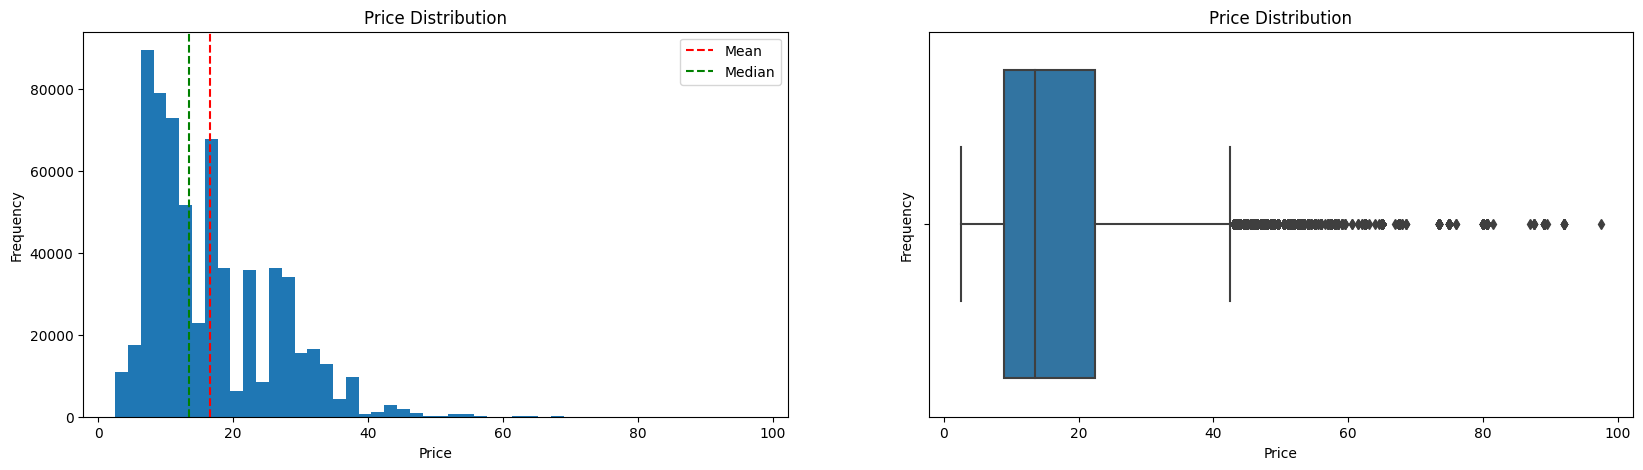

In [85]:
print('Skewness: ',data.price.skew())
print('Mean: ',data.price.mean())
print('Median: ', data.price.median())
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.hist(x='price', bins=50, data=data)
plt.axvline(data.price.mean(), color = 'red', label="Mean", linestyle = 'dashed')
plt.axvline(data.price.median(),color = 'green', label="Median", linestyle = 'dashed')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.title('Price Distribution')

plt.subplot(1,2,2)
sns.boxplot(x='price', data=data)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution')
plt.show()

karena pada kolom price terdistribusi skewed maka akan dilakukan outlier handling menggunakan IQR

In [86]:
# Perhitungan IQR
IQR = data_train.price.quantile(0.75) - data_train.price.quantile(0.25)
lower_limit=  data_train.price.quantile(0.25) - (IQR * 1.5)
upper_limit = data_train.price.quantile(0.75) + (IQR * 1.5)


In [87]:
# mengandung outlier
data_train_outlier = data_train
# mengambil data yang tidak ada outlier
data_train = data_train[(data_train.price > lower_limit) & (data_train.price < upper_limit)]
data_train.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
316659,e5ad6d06-c802-4e85-8a13-2da1e19532f5,1.544856e+09,6,15,12,2018-12-15 06:35:11,America/New_York,Theatre District,Fenway,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,0.88,1.0,42.3661,-71.0631,45.84,43.00,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.92,5.52,7.33,1544918400,9.856,54.47,1544896800,38.94,1544954400,53.80,1544896800,35.08,1544950800,cloudy,43.75,1022.31,220,1.00,0,9.856,298.3,1544875681,1544908425,0.27,0.0074,1544893200,39.54,1544929200,54.47,1544896800,36.46,1544929200,53.80,1544896800
128533,d3e7f328-de60-4c71-a8df-f72914ef433c,1.545112e+09,5,18,12,2018-12-18 05:40:10,America/New_York,Haymarket Square,Back Bay,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,2.30,1.0,42.3519,-71.0643,36.27,29.50,Overcast,Mostly cloudy throughout the day.,0.0000,0.00,0.66,9.02,15.15,1545127200,7.357,32.91,1545159600,20.90,1545220800,22.87,1545159600,14.27,1545195600,cloudy,26.11,1000.40,300,1.00,0,7.357,364.1,1545134994,1545167683,0.37,0.0029,1545152400,23.05,1545192000,37.96,1545109200,11.83,1545134400,31.85,1545109200
185785,4fa6e3b2-3a03-46ea-9845-022404b93359,1.543830e+09,9,3,12,2018-12-03 09:38:02,America/New_York,Fenway,Theatre District,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,18.0,2.38,1.0,42.2148,-71.0330,48.11,48.11,Overcast,Foggy in the morning.,0.0000,0.00,0.94,2.38,2.38,1543860000,2.678,57.87,1543852800,32.80,1543921200,57.20,1543852800,27.22,1543914000,cloudy,46.56,999.60,211,1.00,0,2.678,296.3,1543838223,1543871641,0.89,0.0007,1543852800,42.96,1543896000,57.87,1543852800,39.41,1543896000,57.20,1543852800
538637,382d1405-7638-4256-a80d-57306af4447e,1.543684e+09,17,1,12,2018-12-01 17:03:04,America/New_York,Beacon Hill,North End,Lyft,lyft_line,Shared,5.0,1.68,1.0,42.3505,-71.1054,41.89,41.89,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.00,0.57,2.51,4.03,1543672800,9.953,44.54,1543690800,34.74,1543712400,43.87,1543690800,35.39,1543712400,partly-cloudy-day,27.66,1022.54,325,0.34,2,9.953,275.8,1543665341,1543698866,0.82,0.0000,1543683600,31.31,1543662000,44.54,1543690800,28.10,1543662000,43.87,1543690800
88653,ed8a98f7-dd26-4873-a5e2-52b945688ff6,1.543332e+09,15,27,11,2018-11-27 15:27:23,America/New_York,South Station,North Station,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,29.5,2.38,1.0,42.3519,-71.0643,40.49,34.08,Overcast,Light rain in the morning.,0.0003,0.15,0.89,10.42,14.77,1543338000,5.011,46.72,1543320000,33.65,1543399200,43.70,1543320000,29.88,1543399200,cloudy,37.50,989.46,247,1.00,1,5.011,335.7,1543319469,1543353347,0.68,0.1422,1543338000,35.90,1543377600,46.72,1543320000,31.81,1543377600,43.70,1543320000


Text(0.5, 1.0, 'Data With Outlier')

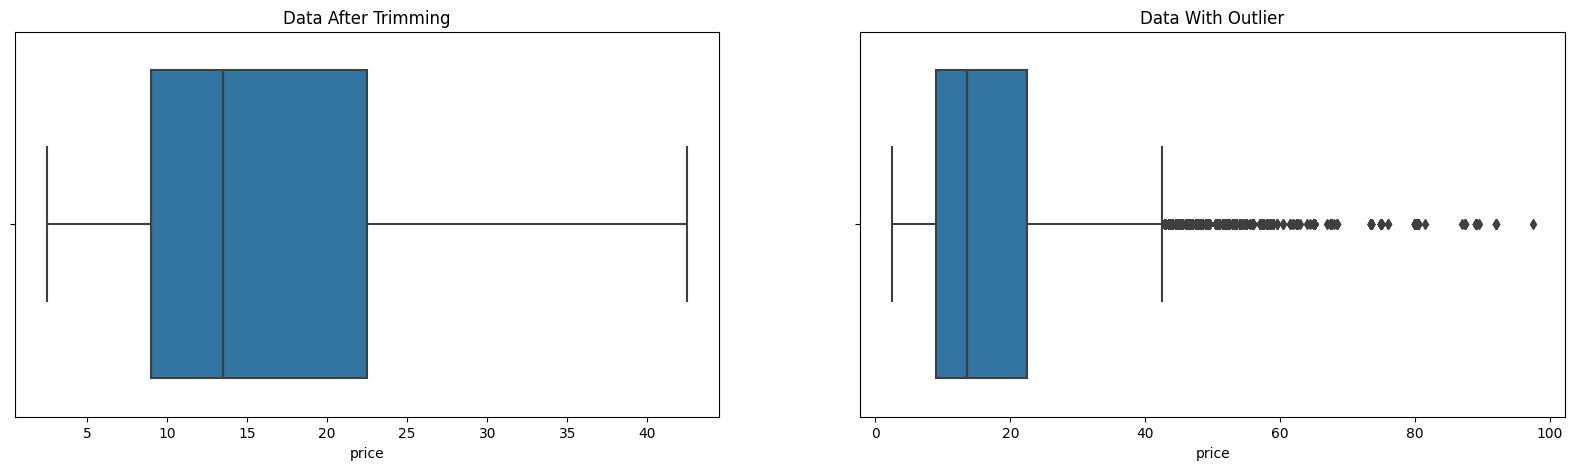

In [88]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='price', data = data_train)
plt.title('Data After Trimming')
plt.subplot(1,2,2)
sns.boxplot(x='price', data = data_train_outlier)
plt.title('Data With Outlier')

pada boxplot pertama menampilkan kolom setelah dilakukan trimming, kolom price sudah tidak memiliki outlier dan pada boxplot ke 2 kolom price masih memiliki outlier

## Feature Selection

In [89]:
# Data dengan outlier
X_train_ou = data_train_outlier[['distance','surge_multiplier','name']] # Feature
y_train_ou = data_train_outlier.price # Target

X_test_ou = data_test[['distance','surge_multiplier','name']] # Feature
y_test_ou = data_test.price # Target

In [90]:
# Data tanpa outlier
X_train = data_train[['distance','surge_multiplier','name']] # Feature
y_train = data_train.price # Target

X_test = data_test[['distance','surge_multiplier','name']] # Feature
y_test = data_test.price # Target

pada cell diatas dilakukan pemisahan kolom bertipe numeric dan kategorical untuk mempermudah proses encoding dan scaling

In [91]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505807 entries, 316659 to 380607
Data columns (total 3 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          505807 non-null  float64
 1   surge_multiplier  505807 non-null  float64
 2   name              505807 non-null  object 
dtypes: float64(2), object(1)
memory usage: 15.4+ MB


In [92]:
# Memisahkan kolom numerik dan kategorikal pada data yang memiliki outlier
num_columns_ou = X_train_ou.select_dtypes(include=np.number).columns
cat_columns_ou = X_train_ou.select_dtypes(include=['object']).columns

print('Num Columns : ', num_columns_ou)
print('Cat Columns : ', cat_columns_ou)

Num Columns :  Index(['distance', 'surge_multiplier'], dtype='object')
Cat Columns :  Index(['name'], dtype='object')


In [93]:
# Memisahkan kolom numerik dan kategorikal pada data yang tiadk memiliki outlier
num_columns = X_train.select_dtypes(include=np.number).columns
cat_columns = X_train.select_dtypes(include=['object']).columns

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  Index(['distance', 'surge_multiplier'], dtype='object')
Cat Columns :  Index(['name'], dtype='object')


In [94]:
# memasukan kolom numeric dan kategorikal ke variabel baru
X_train_num_ou = X_train_ou[num_columns_ou]
X_test_num_ou = X_test_ou[num_columns_ou]

X_train_cat_ou = X_train_ou[cat_columns_ou]
X_test_cat_ou = X_test_ou[cat_columns_ou]

X_train_num_ou

,distance,surge_multiplier
316659,0.88,1.0
128533,2.30,1.0
185785,2.38,1.0
538637,1.68,1.0
88653,2.38,1.0
...,...,...
357676,3.21,1.0
196410,2.62,1.0
539174,3.15,1.0
560976,0.61,1.0


In [95]:
# memasukan kolom numeric dan kategorikal ke variabel baru
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]

X_train_num

,distance,surge_multiplier
316659,0.88,1.0
128533,2.30,1.0
185785,2.38,1.0
538637,1.68,1.0
88653,2.38,1.0
...,...,...
357676,3.21,1.0
196410,2.62,1.0
539174,3.15,1.0
560976,0.61,1.0


## Feature Scalling

In [96]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
distance,505807.0,2.171720,1.116789,0.02,1.27,2.14,2.9,7.86
surge_multiplier,505807.0,1.012218,0.083375,1.00,1.00,1.00,1.0,3.00


In [97]:
# Feature Scaling using StandardScaler

scaler = StandardScaler()

scaler.fit(X_train_num)

X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)
X_train_num_scaled

array([[-1.15663837, -0.14653801],
       [ 0.11486511, -0.14653801],
       [ 0.18649911, -0.14653801],
       ...,
       [ 0.87597635, -0.14653801],
       [-1.39840311, -0.14653801],
       [-0.72683437, -0.14653801]])

In [98]:
scaler.fit(X_train_num_ou)

X_train_num_scaled_ou = scaler.transform(X_train_num_ou)
X_test_num_scaled_ou = scaler.transform(X_test_num_ou)
X_train_num_scaled_ou

array([[-1.1521636 , -0.15755189],
       [ 0.09787566, -0.15755189],
       [ 0.1683004 , -0.15755189],
       ...,
       [ 0.84613859, -0.15755189],
       [-1.38984712, -0.15755189],
       [-0.72961512, -0.15755189]])

In [99]:
# konversi dataframe ke variabel baru
X_train_num_scaled_ou = pd.DataFrame(X_train_num_scaled_ou, columns = num_columns_ou)
X_test_num_scaled_ou = pd.DataFrame(X_test_num_scaled_ou, columns = num_columns_ou)
X_train_num_scaled_ou

,distance,surge_multiplier
0,-1.152164,-0.157552
1,0.097876,-0.157552
2,0.168300,-0.157552
3,-0.447916,-0.157552
4,0.168300,-0.157552
...,...,...
510265,0.898957,-0.157552
510266,0.379575,-0.157552
510267,0.846139,-0.157552
510268,-1.389847,-0.157552


In [100]:
# konversi dataframe ke variabel baru
X_train_num_scaled = pd.DataFrame(X_train_num_scaled, columns = num_columns)
X_test_num_scaled = pd.DataFrame(X_test_num_scaled, columns = num_columns)
X_train_num_scaled

,distance,surge_multiplier
0,-1.156638,-0.146538
1,0.114865,-0.146538
2,0.186499,-0.146538
3,-0.440298,-0.146538
4,0.186499,-0.146538
...,...,...
505802,0.929702,-0.146538
505803,0.401401,-0.146538
505804,0.875976,-0.146538
505805,-1.398403,-0.146538


## Feature Encoding

In [101]:
X_train_cat

,name
316659,UberPool
128533,UberX
185785,UberXL
538637,Shared
88653,Black SUV
...,...
357676,Lux Black
196410,UberPool
539174,Lyft XL
560976,Black


In [102]:
encoder = OneHotEncoder()

encoder.fit(X_train_cat)

X_train_cat_encoded = encoder.transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

In [103]:
encoder_ou = OneHotEncoder()
encoder_ou.fit(X_train_cat_ou)

X_train_cat_encoded_ou = encoder_ou.transform(X_train_cat_ou)
X_test_cat_encoded_ou = encoder_ou.transform(X_test_cat_ou)

In [104]:
X_train_cat_encoded = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_columns))
X_test_cat_encoded = pd.DataFrame(X_test_cat_encoded.toarray(), columns=encoder.get_feature_names(cat_columns))

c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [105]:
X_train_cat_encoded_ou = pd.DataFrame(X_train_cat_encoded_ou.toarray(), columns=encoder_ou.get_feature_names(cat_columns_ou))
X_test_cat_encoded_ou = pd.DataFrame(X_test_cat_encoded_ou.toarray(), columns=encoder_ou.get_feature_names(cat_columns_ou))


c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [106]:
X_train_cat_encoded

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
505802,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505803,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
505804,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
505805,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
X_test_cat_encoded

,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127691,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127692,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
127693,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127694,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Feature Concate

In [108]:
X_train_final = pd.concat([X_train_num_scaled, X_train_cat_encoded], axis = 1)
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_encoded], axis = 1)

In [109]:
X_train_final_ou = pd.concat([X_train_num_scaled_ou, X_train_cat_encoded_ou], axis = 1)
X_test_final_ou = pd.concat([X_test_num_scaled_ou, X_test_cat_encoded_ou], axis = 1)

In [110]:
X_train_final

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-1.156638,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.114865,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.186499,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.440298,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.186499,-0.146538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505802,0.929702,-0.146538,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
505803,0.401401,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
505804,0.875976,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
505805,-1.398403,-0.146538,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
X_test_final

,distance,surge_multiplier,name_Black,name_Black SUV,name_Lux,name_Lux Black,name_Lux Black XL,name_Lyft,name_Lyft XL,name_Shared,name_UberPool,name_UberX,name_UberXL,name_WAV
0,-0.601475,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.867022,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.616303,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.813297,-0.146538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.905919,-0.146538,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127691,-0.852194,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127692,2.765323,-0.146538,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
127693,-1.040233,-0.146538,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
127694,0.723754,-0.146538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Model Definition

In [112]:
model_lin_reg = LinearRegression()
model_lin_reg_ou = LinearRegression()

## Model Training

In [113]:
model_lin_reg.fit(X_train_final, y_train)

LinearRegression()

In [114]:
model_lin_reg_ou.fit(X_train_final_ou, y_train_ou)

LinearRegression()

In [115]:
# Predict train-set dan test-set
y_pred_train = model_lin_reg.predict(X_train_final)
y_pred_test = model_lin_reg.predict(X_test_final)
y_pred_train

array([ 5.25113297, 10.05372238, 16.15560913, ..., 17.35383606,
       16.27752304,  6.53282547])

In [116]:
# Predict train-set and test-set untuk data dengan outlier
y_pred_train_ou = model_lin_reg_ou.predict(X_train_final_ou)
y_pred_test_ou = model_lin_reg_ou.predict(X_test_final_ou)
y_pred_train_ou

array([ 5.09143293, 10.07068741, 16.20831442, ..., 17.30203223,
       16.10423636,  6.4314431 ])

## Model Evaluation

In [117]:
# Evaluate Model data tanpa outlier
print(f'MAE train set : {mean_absolute_error(y_train, y_pred_train)}')
print(f'MAE test set  : {mean_absolute_error(y_test, y_pred_test)}')
print('-'*40)
print('R2 train set  : ', r2_score(y_train, y_pred_train))
print('R2 test set   : ', r2_score(y_test, y_pred_test))


MAE train set : 1.6765585785780623
MAE test set  : 1.7657319030013694
----------------------------------------
R2 train set  :  0.9332942834999571
R2 test set   :  0.9244941831018246


dari hasil evaluasi diatas didapat nilai MAE train set sebesar 1.68 dan MAE test set sebesar 1.77, dan R2 scrore pada Train set sebesa 93% dan test set sebesar 92%, sehingga data ini bisa di sikategorikan goodfit.

In [118]:
# Evaluate Model, data dengan outlier
print(f'MAE train set : {mean_absolute_error(y_train_ou, y_pred_train_ou)}')
print(f'MAE test set  : {mean_absolute_error(y_test_ou, y_pred_test_ou)}')
print('-'*40)
print('R2 train set  : ', r2_score(y_train_ou, y_pred_train_ou))
print('R2 test set   : ', r2_score(y_test_ou, y_pred_test_ou))


MAE train set : 1.7766176537672072
MAE test set  : 1.7781310800135757
----------------------------------------
R2 train set  :  0.9270961330073131
R2 test set   :  0.9279566876529799


## Model for Data Inference

In [119]:
data_inference= data_inference.reset_index(drop=True)
data_inference.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,3ff3d7ec-44d9-4fd7-a2a0-abc5b672fef3,1.545037e+09,9,17,12,2018-12-17 09:00:06,America/New_York,Boston University,West End,Lyft,lyft_line,Shared,7.0,3.05,1.0,42.3644,-71.0661,35.84,29.23,Drizzle,Light rain in the morning.,0.0092,0.74,0.94,8.52,10.39,1545022800,3.606,41.39,1545076800,23.87,1545138000,35.93,1545076800,11.81,1545134400,rain,34.25,1004.71,352,1.00,0,3.606,329.7,1545048561,1545081260,0.33,0.0185,1545066000,34.07,1545044400,41.39,1545076800,28.17,1545044400,35.93,1545076800
1,035151ff-b0fc-466e-9a79-f932a15d9b3b,1.545155e+09,17,18,12,2018-12-18 17:50:05,America/New_York,Northeastern University,Financial District,Lyft,lyft,Lyft,13.5,4.22,1.0,42.3429,-71.1003,30.78,20.93,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.40,12.73,22.33,1545127200,10.000,32.84,1545159600,20.72,1545220800,22.96,1545159600,14.48,1545195600,clear-day,9.15,1010.60,322,0.00,1,10.000,377.1,1545135001,1545167693,0.37,0.0056,1545152400,22.98,1545192000,37.95,1545109200,12.13,1545134400,32.03,1545109200
2,8411ca10-8f18-498b-a71a-06c401e22183,1.543596e+09,16,30,11,2018-11-30 16:43:05,America/New_York,Theatre District,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,7.5,1.57,1.0,42.3503,-71.0810,40.13,38.00,Clear,Mostly cloudy throughout the day.,0.0000,0.00,0.62,3.46,4.47,1543554000,9.920,42.32,1543600800,31.57,1543665600,40.48,1543611600,28.10,1543658400,clear-day,27.99,1016.84,291,0.12,2,9.920,269.9,1543578871,1543612479,0.79,0.0004,1543593600,28.64,1543579200,42.32,1543600800,29.29,1543579200,40.48,1543611600
3,8a010343-d389-4317-bb13-ea17629414cc,1.543817e+09,6,3,12,2018-12-03 06:02:56,America/New_York,North Station,North End,Lyft,lyft_premier,Lux,13.5,1.04,1.0,42.3503,-71.0810,45.58,45.58,Foggy,Foggy in the morning.,0.0000,0.00,0.96,1.25,2.09,1543856400,1.413,57.02,1543852800,33.74,1543921200,56.35,1543852800,28.53,1543914000,fog,44.50,1001.06,307,1.00,0,1.413,290.9,1543838259,1543871628,0.89,0.0004,1543852800,43.09,1543896000,57.02,1543852800,39.90,1543896000,56.35,1543852800
4,b8bebed0-f7b9-428e-a9b6-32e53eff723e,1.543599e+09,17,30,11,2018-11-30 17:28:03,America/New_York,South Station,Financial District,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.61,1.0,42.2148,-71.0330,41.46,39.41,Mostly Cloudy,Overcast throughout the day.,0.0000,0.00,0.57,3.57,4.27,1543557600,9.928,42.13,1543600800,30.17,1543662000,40.95,1543608000,25.87,1543662000,partly-cloudy-day,27.50,1016.11,266,0.86,1,9.928,271.7,1543578835,1543612492,0.79,0.0000,1543593600,28.90,1543579200,42.13,1543600800,26.20,1543575600,40.95,1543608000


In [120]:
# split numerical and categorical features
data_inference_num = data_inference[num_columns]
data_inference_cat = data_inference[cat_columns]

#scale numerical features
data_inference_num_scaled = scaler.transform(data_inference_num)

#scale categorical features
data_inference_cat_encoded = encoder.transform(data_inference_cat)

#concatenate numerical and categorical features
data_inference_final = np.concatenate([data_inference_num_scaled, data_inference_cat_encoded.toarray()], axis = 1)


In [121]:
y_pred_inference = model_lin_reg.predict(data_inference_final)
y_pred_inference

c:\Users\salma\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 8.24315262, 14.3737793 ,  7.06331253, 14.1629715 , 26.85309982,
       26.16319275,  7.39097595, 14.89151001,  6.69433594,  7.47045517])

In [122]:
y_pred_inference = pd.DataFrame(y_pred_inference)

In [123]:
data_prediksi = pd.concat([data_inference['price'], y_pred_inference], axis = 1)
data_prediksi.columns = ['actual','prediction']
data_prediksi

,actual,prediction
0,7.0,8.243153
1,13.5,14.373779
2,7.5,7.063313
3,13.5,14.162971
4,26.0,26.853100
5,26.0,26.163193
6,7.0,7.390976
7,13.5,14.891510
8,7.0,6.694336
9,9.5,7.470455


In [124]:
print('intercept :', model_lin_reg.intercept_)
print('Slope     :', model_lin_reg.coef_)

intercept : 33923331213.155754
Slope     : [ 2.98203681e+00  1.13432285e+00 -3.39233312e+10 -3.39233312e+10
 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10
 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10
 -3.39233312e+10 -3.39233312e+10]


In [125]:
X_train_final.columns

Index(['distance', 'surge_multiplier', 'name_Black', 'name_Black SUV',
       'name_Lux', 'name_Lux Black', 'name_Lux Black XL', 'name_Lyft',
       'name_Lyft XL', 'name_Shared', 'name_UberPool', 'name_UberX',
       'name_UberXL', 'name_WAV'],
      dtype='object')

# Answer

> 1. Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression !

Linear regression adalah teknik pemodelan yang digunakan untuk memprediksi suatu variabel respon yang merupakan linier terhadap satu atau lebih variabel prediktor. Dalam melakukan linear regression, ada beberapa asumsi yang harus dipenuhi:

- Linearitas: hubungan antara variabel respon dan prediktor harus linier.
- Homoscedasticity: varians dari error harus sama pada setiap nilai dari variabel prediktor.
- Multikolinieritas: variabel prediktor tidak boleh terlalu tinggi korelasinya satu sama lain.
- Autokorelasi: tidak ada autokorelasi antara error.
- Normalitas: error harus merupakan distribusi normal.
  
Jika asumsi-asumsi ini tidak terpenuhi, maka hasil dari analisis linear regression mungkin tidak akurat.

> 2. Tunjukkan dan tafsirkan arti dari coefficient dan slope yang didapat dari model yang telah Anda bangun !

In [126]:
print('intercept :', model_lin_reg.intercept_)
print('Slope     :', model_lin_reg.coef_)

intercept : 33923331213.155754
Slope     : [ 2.98203681e+00  1.13432285e+00 -3.39233312e+10 -3.39233312e+10
 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10
 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10 -3.39233312e+10
 -3.39233312e+10 -3.39233312e+10]


dilihat dari intercept dan slope maka dapat dibuat persamaan regresi


y = 33923331213.155754 + (2.98203681e+00 x distance) + (1.13432285e+00 x surge_multiplier) + (-3.39233312e+10 x name_Black) + (-3.39233312e+10 x name_Black SUV) + ... + (-3.39233312e+10 x name_WAV)

# Overall Analysis

Kesimpulan yang dapat diambil dari hasil EDA dan model linear regression :

Tarif dari uber dan lyft ini dipengaruhi oleh jarak perjalanan yang ditempuh, jenis kendaraan yang dipakai dan khusus untuk lyft dipengaruhi oleh banyaknya permintaan sehingga harga akan miningkat jika banyak permintaan, sedangkan pada uber tidak berpengaruh terhadap harga jika permintaan banyak.

dari hasil yang sudah dianalisis di bagian EDA maka feature yang digunakan adalah name, distance dan surge_multiplier menggunakan model linear regression dan mendapatkan hasil dari model dengan 
- R2 score untuk train set sebesar 0.93
- R2 score untuk test set sebesar 0.92
- MAE untuk train set sebesar 1.68
- MAE untuk test set sebesar 1.77
  
dengan hasil tersebut model ini tergolong goodfit

pada saat pemodelan saya menggunakan 2 data yaitu data yang masih memiliki outlier dan data yang sudah di trimming atau sudah tidak ada outlier, pada data yang masih memiliki outlier hasil yang didapatkan adalah :

- R2 train set  :  0.9270961330073131
- R2 test set   :  0.9279566876529799
- MAE train set : 1.7766176537672072
- MAE test set  : 1.7781310800135757
  
  hasil tersebut tidak jauh berbeda dengan data yang outliernya sudah dikeluarkan namun karena asumsi linear regression data harus terdistribusi normal maka yang dipakai adalah yang sudah tidak memiliki outlier agar hasilnya lebih akurat